# 泰坦尼克号数据分析

## 清洗数据

In [112]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
data = pd.read_csv("泰坦尼克号.csv")

# 空值处理
data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(np.int64)
data['Embarked'] = data['Embarked'].fillna("S")

# 删除无关列
data.drop(['Ticket'],axis='columns')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C148,C


## 生还人数比例

342


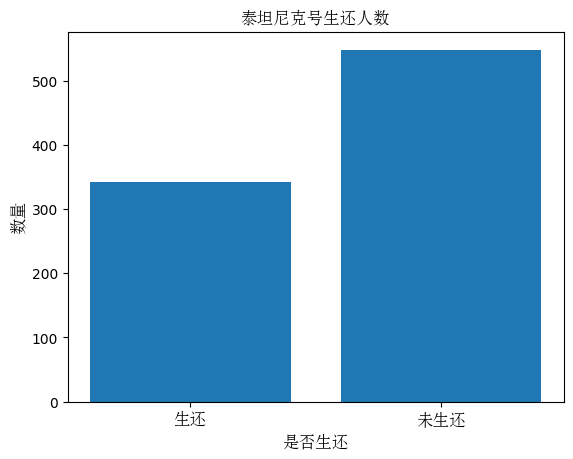

In [113]:
# 统计生还人数
survive_count = data[data["Survived"] == 1]['Survived'].count()
print(survive_count)
not_survive_count = data[data["Survived"] == 0]['Survived'].count()
# 绘制柱型图
font = fm.FontProperties(fname='simsun.ttc', size=12)
plt.bar(['生还', '未生还'], [survive_count, not_survive_count])
plt.title("泰坦尼克号生还人数", fontproperties=font)
plt.xlabel('是否生还', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()


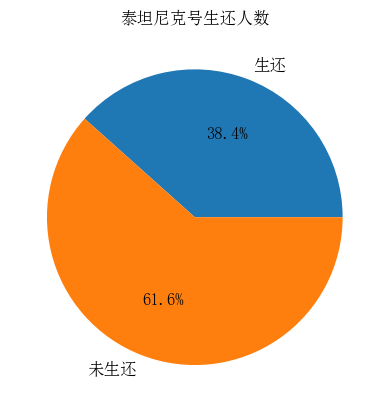

In [114]:
# 绘制饼状图
label = ['生还', '未生还']
sizes = [survive_count, not_survive_count]
plt.pie(sizes, labels=label, autopct='%1.1f%%',
        textprops={'fontproperties': font})
plt.title("泰坦尼克号生还人数", fontproperties=font)
plt.show()

## 泰坦尼克号乘客等级分布

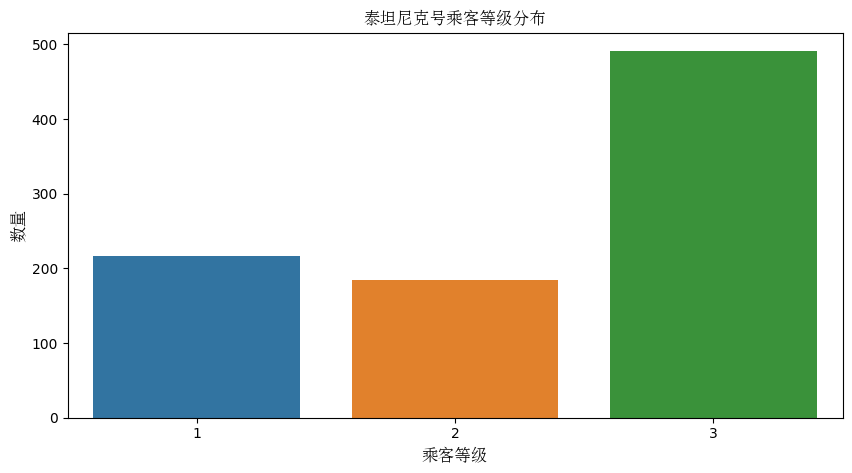

In [115]:
import seaborn as sns
data[['Survived', 'Pclass']].groupby(['Pclass']).count()
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=data)
plt.xlabel('乘客等级', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
plt.title("泰坦尼克号乘客等级分布", fontproperties=font)
plt.show()

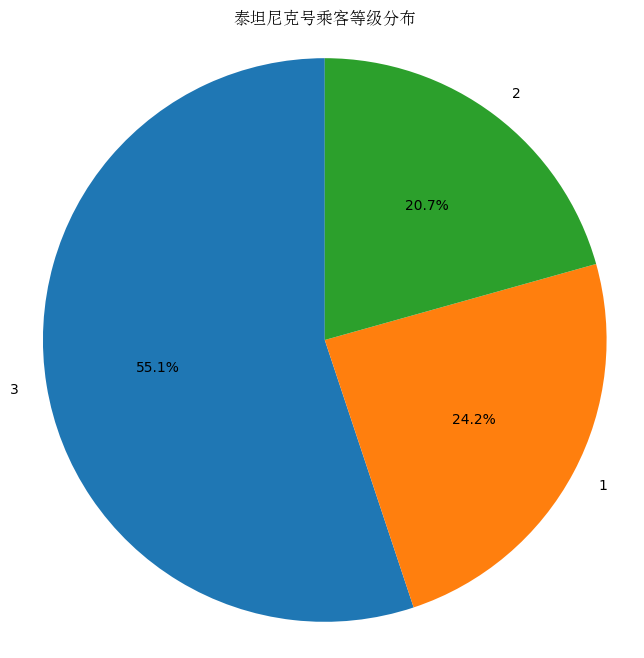

In [116]:
counts = data['Pclass'].value_counts()
# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('泰坦尼克号乘客等级分布',fontproperties=font)
plt.axis('equal')
plt.show()

## 乘客等级与生还率的关系

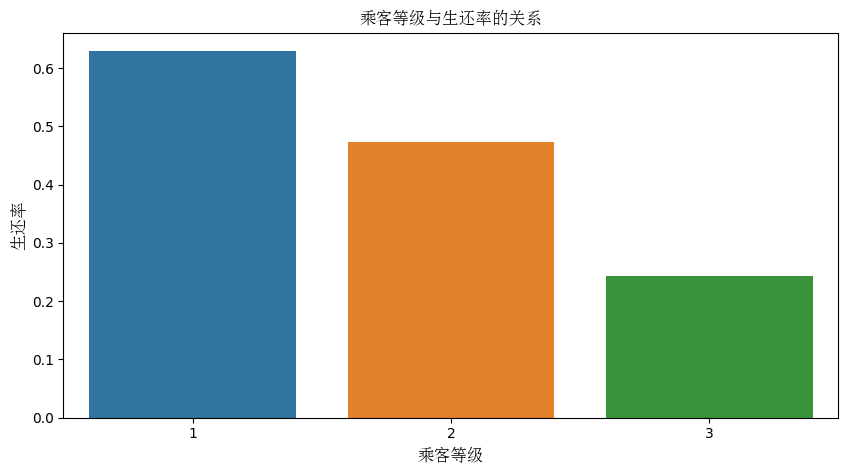

In [117]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=data, errorbar=None)
plt.title('乘客等级与生还率的关系',fontproperties=font)
plt.xlabel('乘客等级', fontproperties=font)
plt.ylabel('生还率', fontproperties=font)
plt.show()


Text(0.5, 1.0, '乘客等级与生还率的关系')

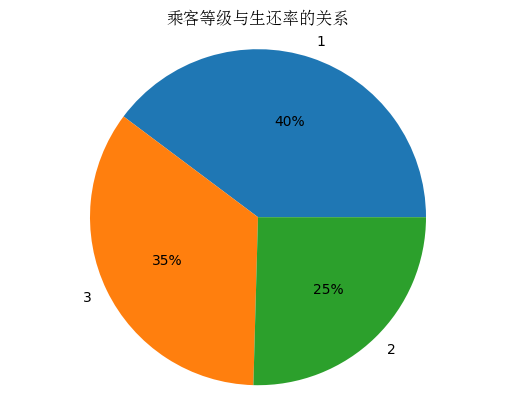

In [118]:
survived_data = data[data['Survived'] == 1]
# 计算各乘客等级生还人数
pclass_counts = survived_data['Pclass'].value_counts()
# 计算生还人数总数
total_survived = pclass_counts.sum()
# 计算各乘客等级占生还人数总数的比例
pclass_ratios = pclass_counts / total_survived
# 输出结果
plt.pie(pclass_ratios.values, labels=pclass_ratios.index, autopct='%1.0f%%')
plt.axis("equal")
plt.title('乘客等级与生还率的关系',fontproperties=font)


## 性别与生还率的关系

[0.68128655 0.31871345]


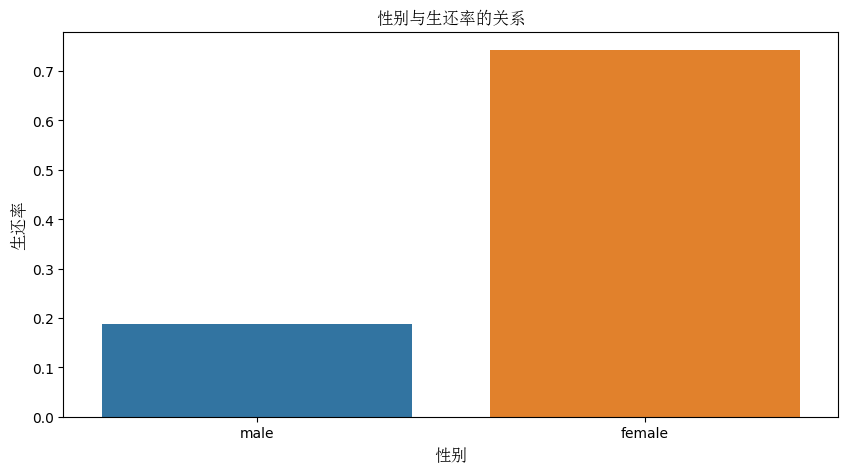

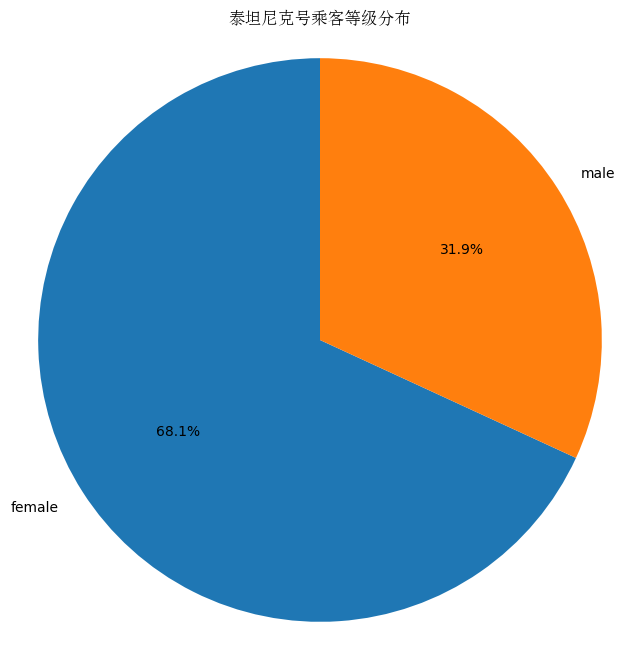

In [119]:
import seaborn as sns
survived_data = data[data['Survived'] == 1]
sex_counts = survived_data['Sex'].value_counts()
total_survived = sex_counts.sum()
sex_ratios = sex_counts / total_survived
print(sex_ratios.values)
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Sex",y="Survived",errorbar=None)
plt.title('性别与生还率的关系',fontproperties=font)
plt.xlabel('性别',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(sex_ratios.values, labels=sex_ratios.index, autopct='%1.1f%%', startangle=90)
plt.title('泰坦尼克号乘客等级分布',fontproperties=font)
plt.axis('equal')
plt.show()


## 年龄与生还率关系

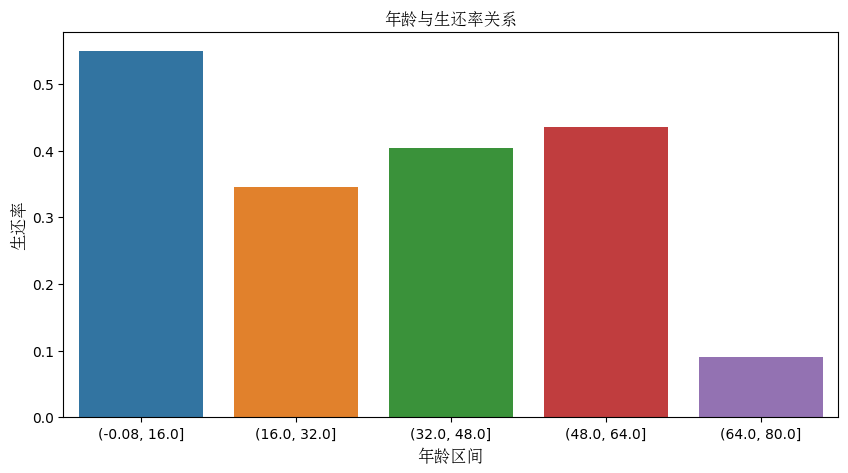

In [120]:
data['AgeGroup'] = pd.cut(data['Age'], 5)
data[['Survived', 'AgeGroup']].groupby(['AgeGroup']).count()
plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup', y='Survived', data=data, errorbar=None)
plt.title("年龄与生还率关系", fontproperties=font)
plt.xlabel('年龄区间', fontproperties=font)
plt.ylabel('生还率', fontproperties=font)
plt.show()


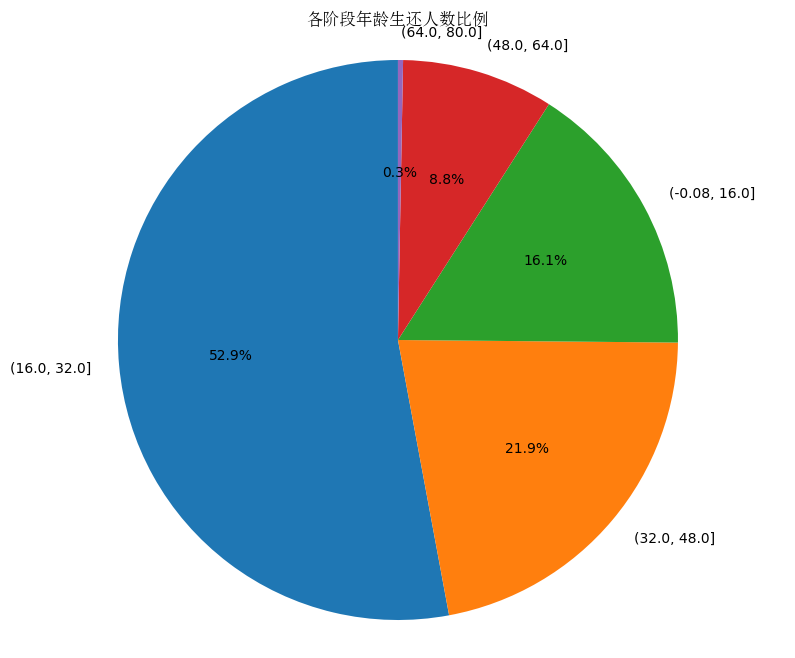

In [121]:
# 筛选生还者数据
survived_data = data[data['Survived'] == 1]
# 计算各阶段年龄生还人数
age_bins = pd.cut(survived_data['Age'], 5)
age_counts = age_bins.value_counts()
# 计算生还人数总数
total_survived = age_counts.sum()
# 计算各阶段年龄占生还人数总数的比例
age_ratios = age_counts / total_survived
# 输出结果
plt.figure(figsize=(10, 8))
plt.pie(age_ratios.values, labels=age_ratios.index, autopct='%1.1f%%', startangle=90)
plt.title('各阶段年龄生还人数比例',fontproperties=font)
plt.axis('equal')
plt.show()


## 兄弟姐妹及配偶的个数与生还率关系

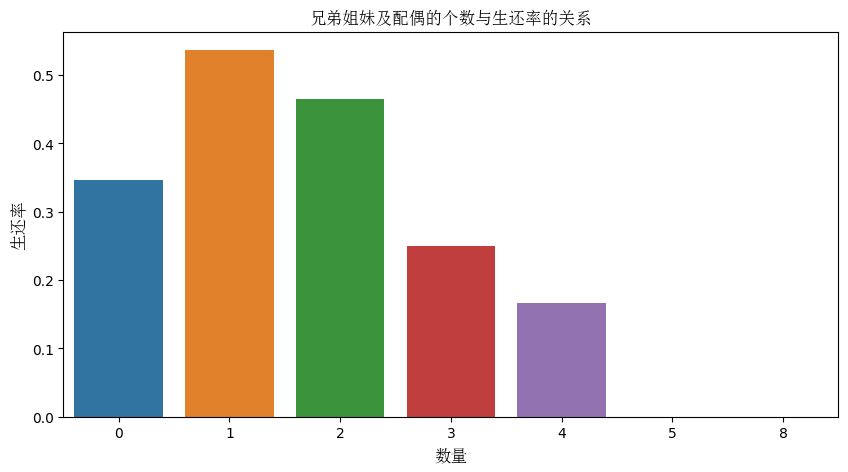

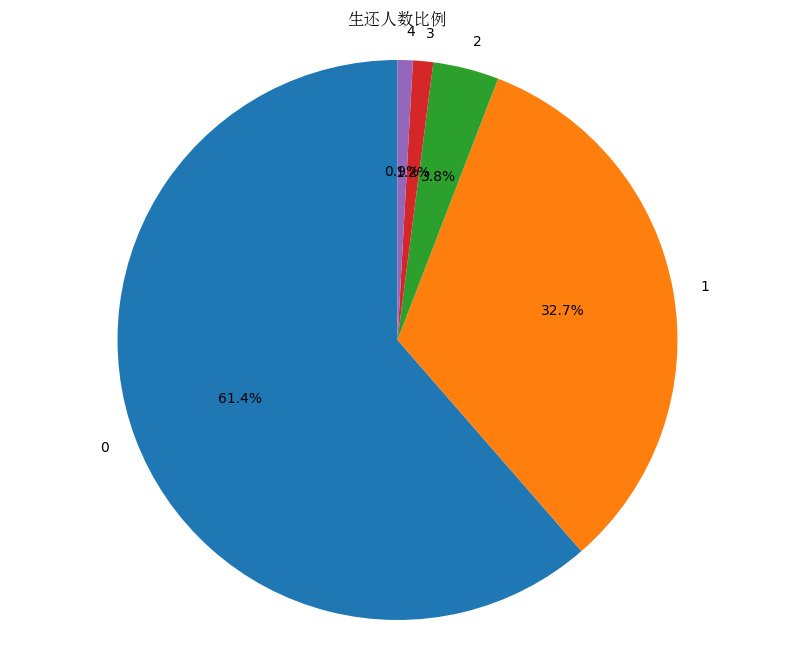

In [122]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="SibSp",y="Survived",errorbar=None)
plt.title('兄弟姐妹及配偶的个数与生还率的关系',fontproperties=font)
plt.xlabel('数量',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()
# 筛选出生还的乘客
survived = data[data['Survived'] == 1]
sibsp_bins = survived['SibSp']
# 计算SibSp数量占总生还人数的比例
sibsp_ratio = sibsp_bins.value_counts() / sibsp_bins.sum()
plt.figure(figsize=(10, 8))
plt.pie(sibsp_ratio.values, labels=sibsp_ratio.index, autopct='%1.1f%%', startangle=90)
plt.title('生还人数比例',fontproperties=font)
plt.axis('equal')
plt.show()


## 父母或子女的个数与生还率关系

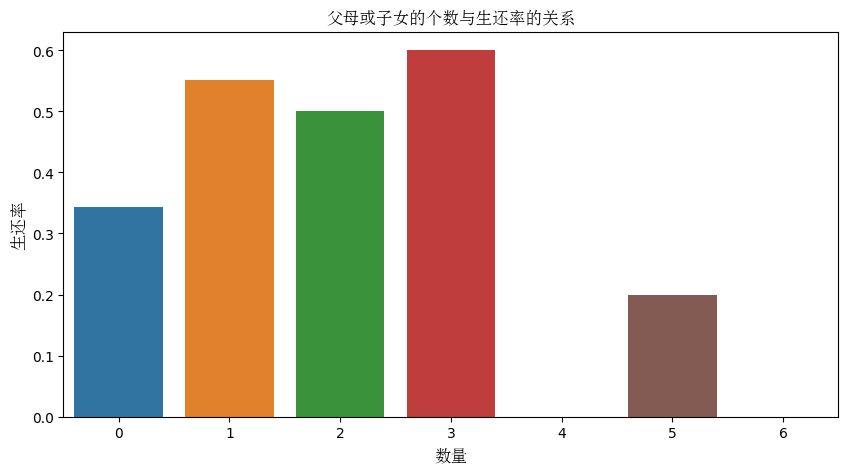

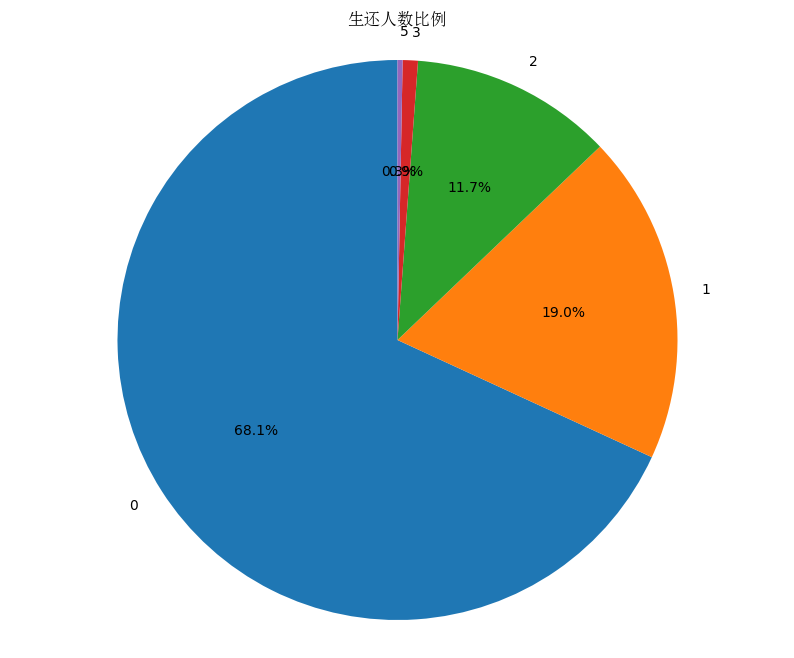

In [123]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Parch",y="Survived",errorbar=None)
plt.title('父母或子女的个数与生还率的关系',fontproperties=font)
plt.xlabel('数量',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()
# 筛选出生还的乘客
survived = data[data['Survived'] == 1]
parch_bins = survived['Parch']
# 计算SibSp数量占总生还人数的比例
parch_ratio = parch_bins.value_counts() / parch_bins.sum()
plt.figure(figsize=(10, 8))
plt.pie(parch_ratio.values, labels=parch_ratio.index, autopct='%1.1f%%', startangle=90)
plt.title('生还人数比例',fontproperties=font)
plt.axis('equal')
plt.show()

## 船票价格与生还率关系

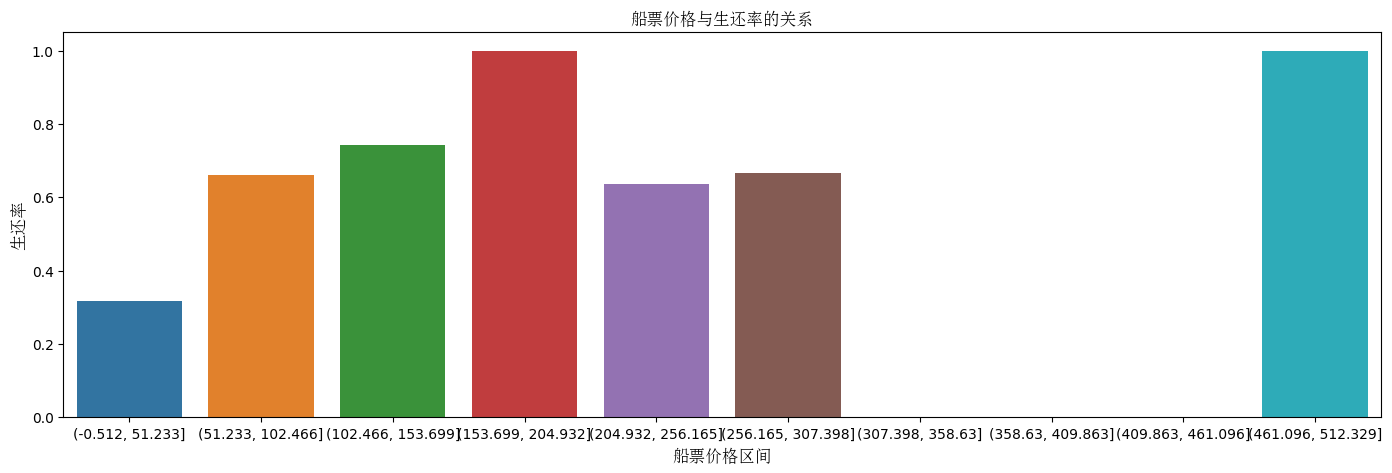

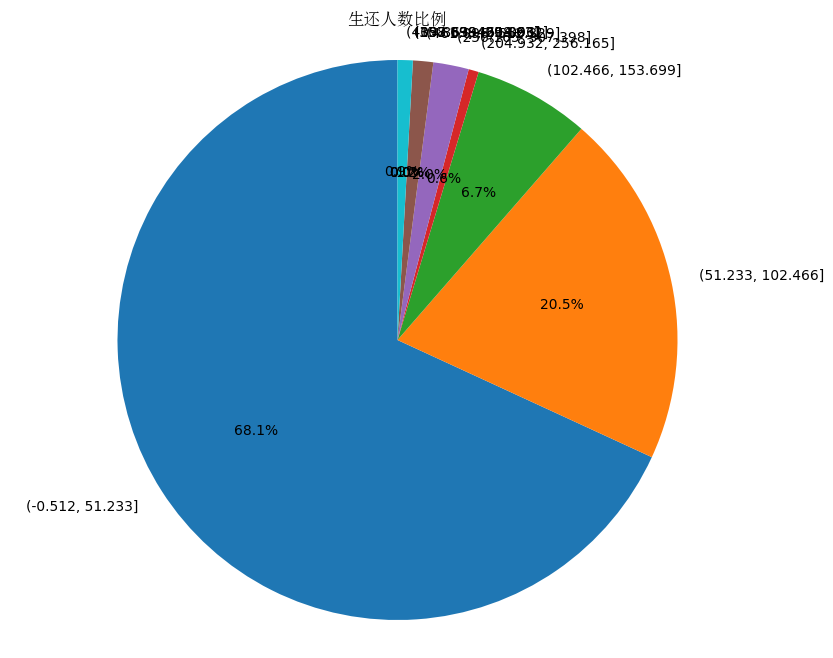

In [124]:
import seaborn as sns
data['FareGroup'] = pd.cut(data['Fare'], 10)
data[['Survived', 'FareGroup']].groupby(['FareGroup']).count()
plt.figure(figsize=(17,5))
sns.barplot(data=data,x="FareGroup",y="Survived",errorbar=None)
plt.title('船票价格与生还率的关系',fontproperties=font)
plt.xlabel('船票价格区间',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()

bins = pd.cut(data['Fare'], 10)
# 统计各区间内的乘客数
fare_counts = bins.value_counts()
# 统计各区间内生还的乘客数
survived_counts = data.groupby(bins)['Survived'].sum()
plt.figure(figsize=(10, 8))
plt.pie(survived_counts, labels=fare_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('生还人数比例',fontproperties=font)
plt.axis('equal')
plt.show()

## 舱位与生还率关系

  Group  Survived  Total  Survival Rate
0     A         7     15       0.466667
1     B        35     47       0.744681
2     C        35     59       0.593220
3     D        25     33       0.757576
4     E        24     32       0.750000
5     F         8     13       0.615385
6     G         2      4       0.500000
7     T         0      1       0.000000


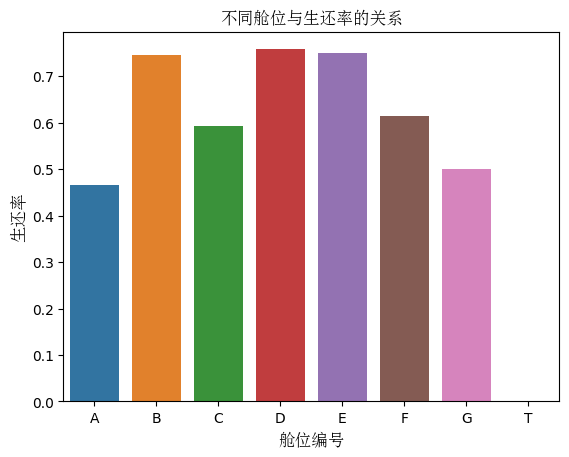

PassengerId     342
Survived        342
Pclass          342
Name            342
Sex             342
Age             342
SibSp           342
Parch           342
Ticket          342
Fare            342
Cabin           136
Embarked        342
AgeGroup        342
FareGroup       342
Cabin_Letter    136
dtype: int64


<Figure size 1000x800 with 0 Axes>

In [125]:
# 提取Cabin列的首字母
data['Cabin_Letter'] = data['Cabin'].str[0]
# 按照Cabin_Letter列进行分组
grouped_data = data.groupby('Cabin_Letter')
# 统计每组的生还人数和总人数
result = grouped_data.agg({'Survived': ['sum', 'count']})
# 将多级列索引转换为单级列索引
result.columns = ['Survived', 'Total']
# 计算每组的生还率
result['Survival Rate'] = result['Survived'] / result['Total']
# 将首字母相同的组合并
result['Group'] = result.index
result['Group'] = result['Group'].apply(lambda x: x.upper())
result = result.groupby('Group').agg({'Survived': 'sum', 'Total': 'sum', 'Survival Rate': 'mean'})
# 重置索引并打印结果
result = result.reset_index()
print(result)
sns.barplot(data=result,x="Group",y="Survival Rate",errorbar=None)
plt.title('不同舱位与生还率的关系',fontproperties=font)
plt.xlabel('舱位编号',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()
plt.figure(figsize=(10, 8))
survived_data = data[data['Survived'] == 1]
print(survived_data.count())
# plt.pie(survived_counts, labels=fare_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title('生还人数比例',fontproperties=font)
# plt.axis('equal')
# plt.show()



## 登陆口岸与生还率关系

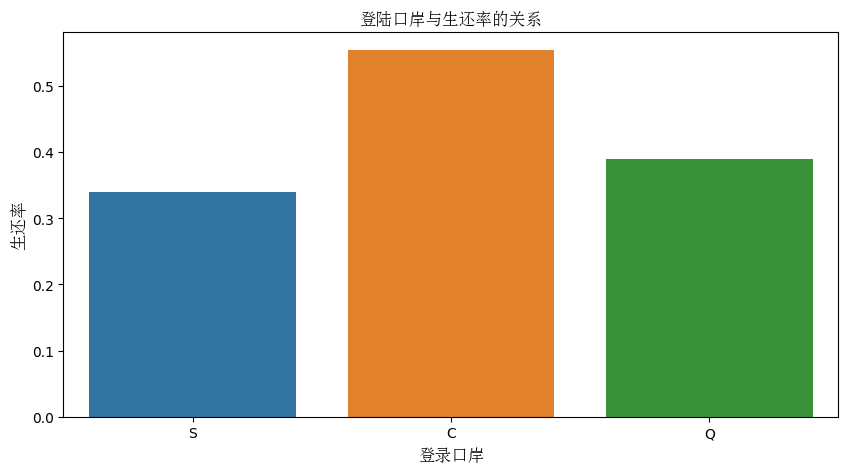

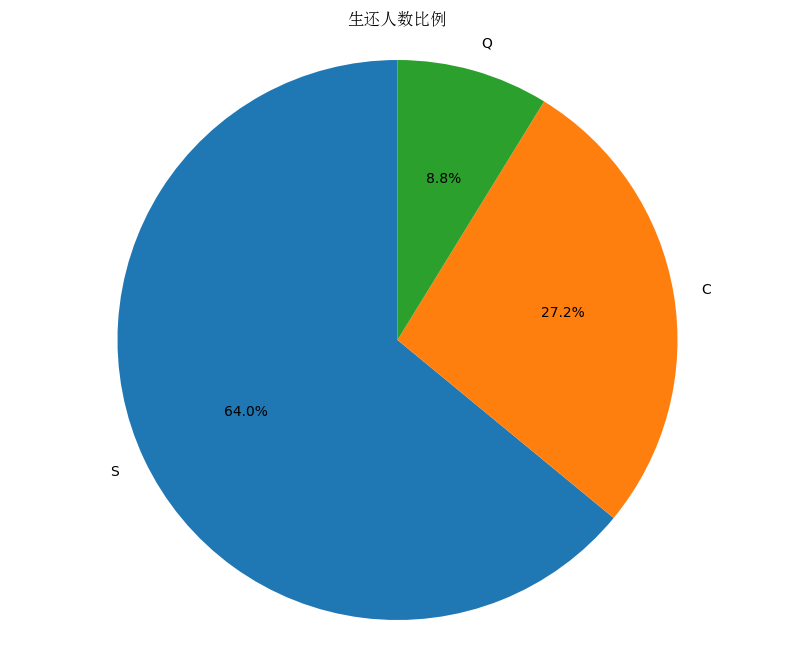

In [131]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Embarked",y="Survived",errorbar=None)
plt.title('登陆口岸与生还率的关系',fontproperties=font)
plt.xlabel('登录口岸',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()
survived = data[data['Survived'] == 1]
embarked_bins = survived['Embarked']
embarked_ratio = embarked_bins.value_counts() / embarked_bins.count()
plt.figure(figsize=(10, 8))
plt.pie(embarked_ratio.values, labels=embarked_ratio.index, autopct='%1.1f%%', startangle=90)
plt.title('生还人数比例',fontproperties=font)
plt.axis('equal')
plt.show()


# “链家”北京二手房数据分析

平均数为：6.643967897040716
标准差为：13.39655260342123
中位数为：5.569620253164557
最小值为：1.2234042553191489


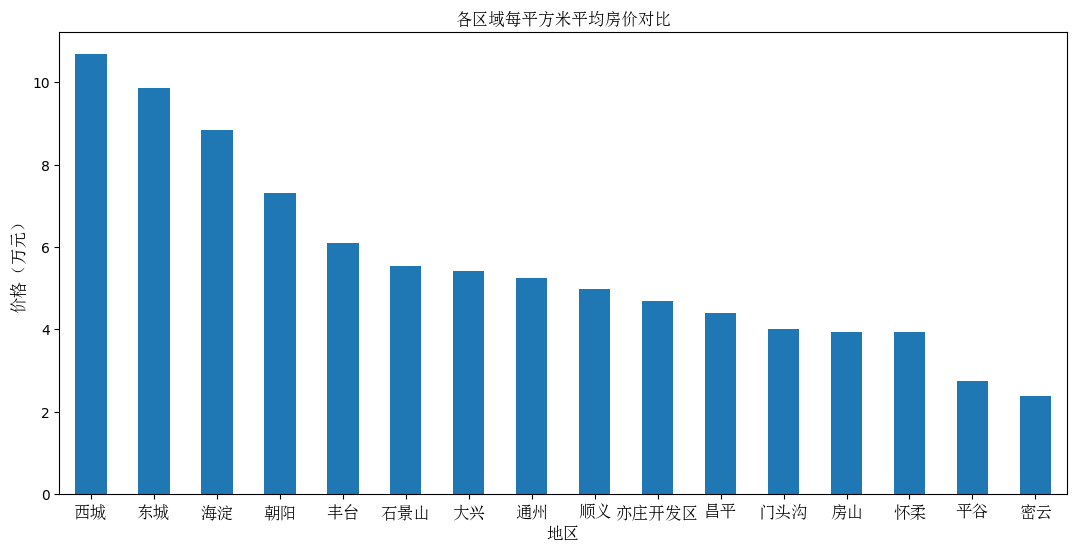

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn
data = pd.read_csv("lianjia.csv")
# 统计房屋总价
price_per_square = data['Price']/data['Size']
data['PricePerSquare'] = price_per_square
sum = price_per_square.sum()
# 平均数
average = sum/price_per_square.count()
print("平均数为：",end='')
print(average)
# 标准差
std_data = price_per_square.std()
print("标准差为：",end='')
print(std_data)
# 中位数
medium_data = price_per_square.median()
print("中位数为：",end='')
print(medium_data)
# 最小值
min_data = price_per_square.min()
print("最小值为：",end='')
print(min_data)

font = fm.FontProperties(fname='simsun.ttc', size=12)
# 每平方米平均房价数据
new_data = data.groupby('Region')['PricePerSquare']
# 各地区二手房数量
count_data = new_data.count()
new_data = new_data.sum()/new_data.count()
new_data = new_data.sort_values(ascending=False).reindex()
new_data.plot(kind='bar', x='Region',
              y='PricePerSquare', rot=0, figsize=(13, 6))
plt.title("各区域每平方米平均房价对比", fontproperties=font)
plt.xlabel('地区', fontproperties=font)
plt.ylabel('价格（万元）', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()


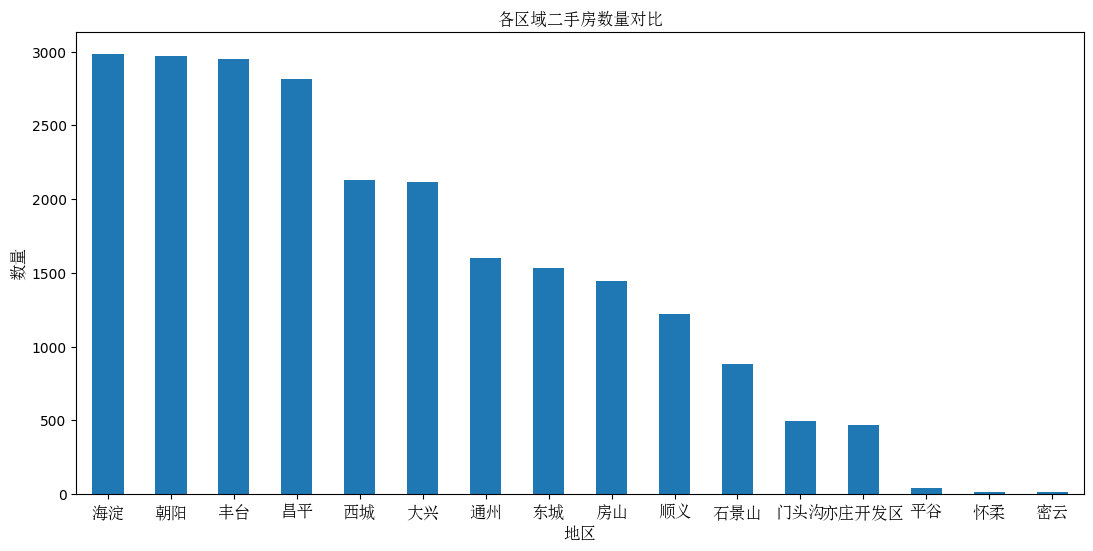

In [135]:
count_data = count_data.sort_values(ascending=False).reindex()
count_data.columns = ['Region','Count']
count_data.plot(kind='bar', x='Region',
              y='Count', rot=0, figsize=(13, 6))
plt.title("各区域二手房数量对比", fontproperties=font)
plt.xlabel('地区', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()

/tmp/ipykernel_27044/3487183944.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value_counts.index, rug=True, kde=True, hist=True, color='blue')


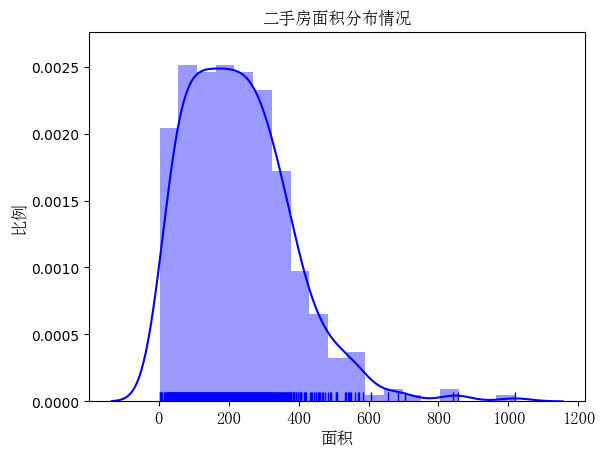

In [138]:
import seaborn as sns
value_counts = data['Size'].value_counts(normalize=True).apply(lambda x: '{:.2%}'.format(x))
sns.distplot(value_counts.index, rug=True, kde=True, hist=True, color='blue')
plt.title("二手房面积分布情况", fontproperties=font)
plt.xlabel('面积', fontproperties=font)
plt.ylabel('比例', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()

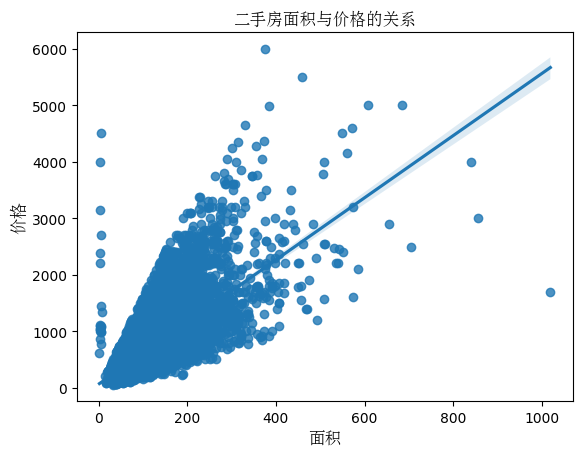

In [139]:
sns.regplot(x='Size',y='Price',data=data)
plt.title('二手房面积与价格的关系',fontproperties=font)
plt.xlabel('面积',fontproperties=font)
plt.ylabel('价格',fontproperties=font)
plt.show()